In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.sample(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
9974,0.58,0.62,3,218,3,0,0,0,support,medium
2086,0.12,0.87,4,244,5,0,0,0,sales,low
13271,0.70,0.76,4,173,2,0,0,0,support,medium
12384,0.36,0.48,2,156,3,0,1,0,accounting,high
12567,0.10,0.97,6,282,4,0,1,0,hr,medium
3322,1.00,0.88,4,191,4,0,0,0,technical,low
9469,0.16,0.87,5,163,3,0,0,0,management,medium
11032,0.95,0.63,3,153,2,0,0,0,sales,low
7205,0.13,0.65,2,209,5,0,0,0,accounting,low
10754,0.70,0.73,4,182,3,0,0,0,IT,medium


## Data quality check

In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [6]:
# Check for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

## Understand what factors contributed most to employee turnover

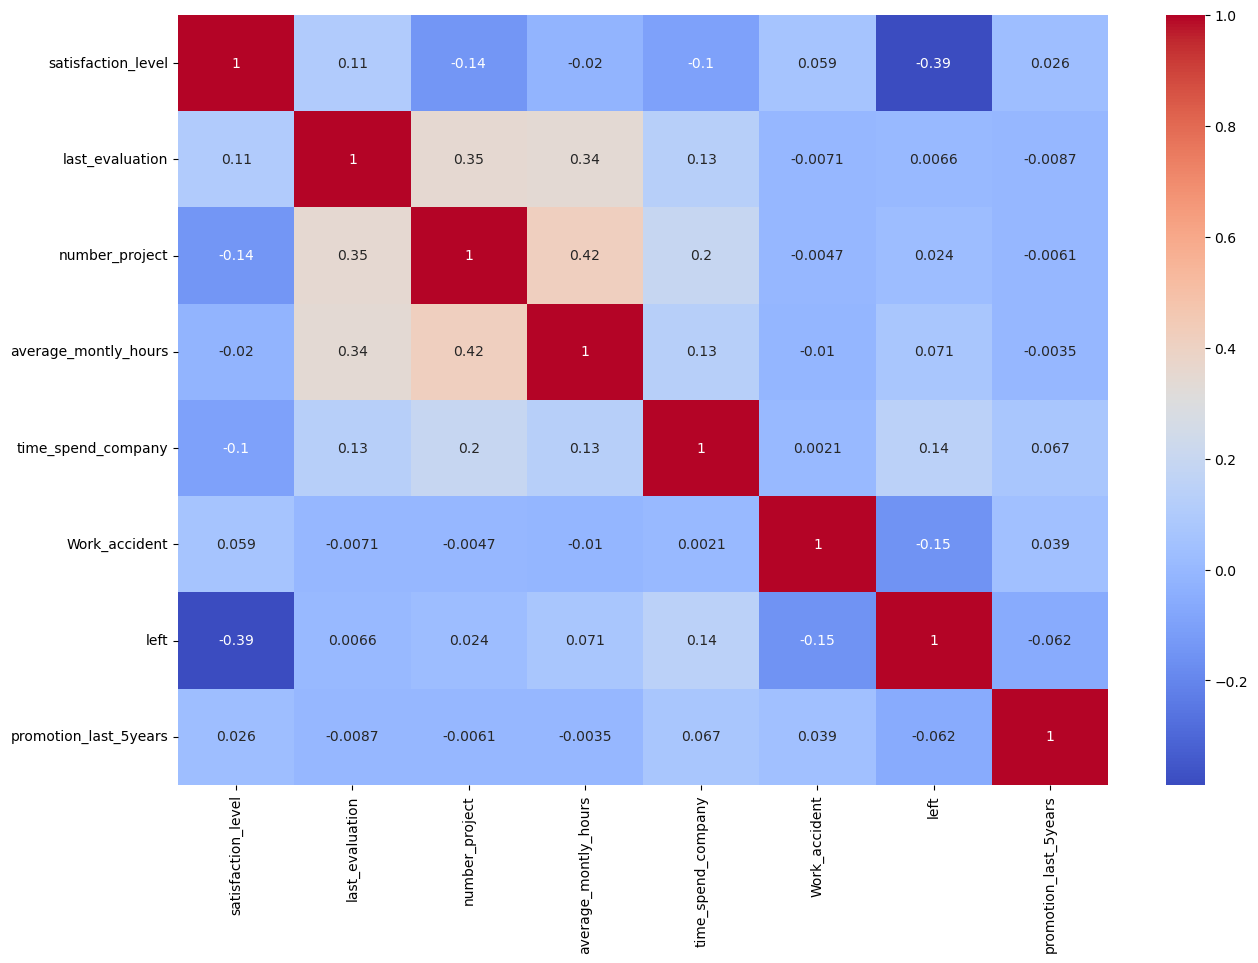

In [7]:
# Draw a heatmap of the correlation matrix between all numerical features
numerical_col = df.select_dtypes(include='number')
corr = numerical_col.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Observations:
- The correlation matrix shows that aveagrage_monthly_hours is highly correlated with number_projects and last_evaluation. This shows that employess who work on more projects tend to have higher average monthly hours.
- number_project is also highly correlated with last_evaluation. It shows that employees with higher performance evaluations tend to be assigned more projects.

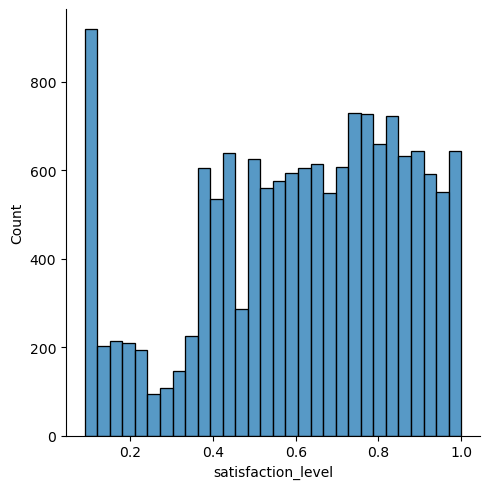

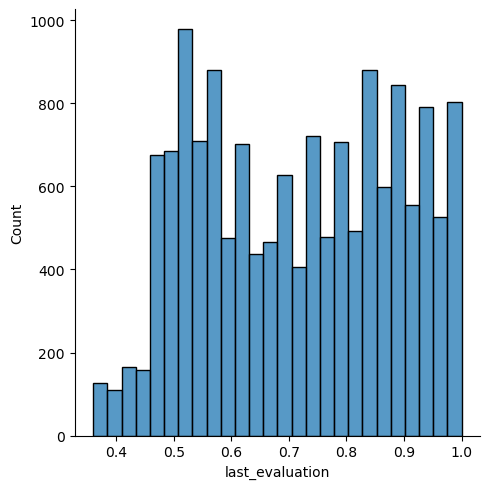

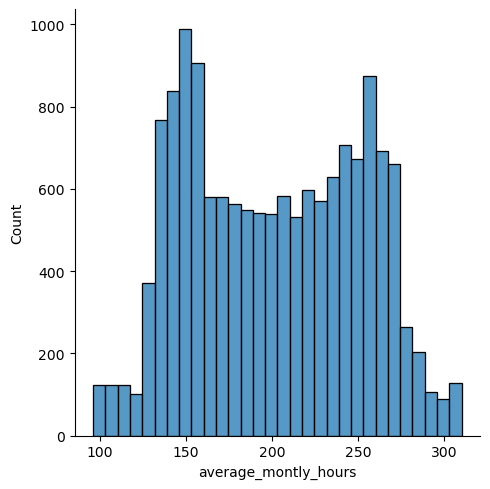

In [8]:
# Draw a distribution plot of employee satisfaction, employe evaluation, and average monthly hours
sns.displot(df['satisfaction_level'])
sns.displot(df['last_evaluation'])
sns.displot(df['average_montly_hours'])
plt.show()


### Observations:
#### Employee satisfaction:
- A significant number of employees have a satisfaction level close to 0.1, which could indicate dissatisfaction.
- There is also a high concentration of employees with satisfaction levels around 0.7-0.9.

#### Employee evaluation:
- The peaks at 0.5, 0.6, and 0.9 suggest that employees are frequently evaluated around these values.

#### Average monthly hours:
- Peaks around 150 and 250 hours.
- A smaller peak near 300 hours could indicate a subset of employees working extreme overtime.

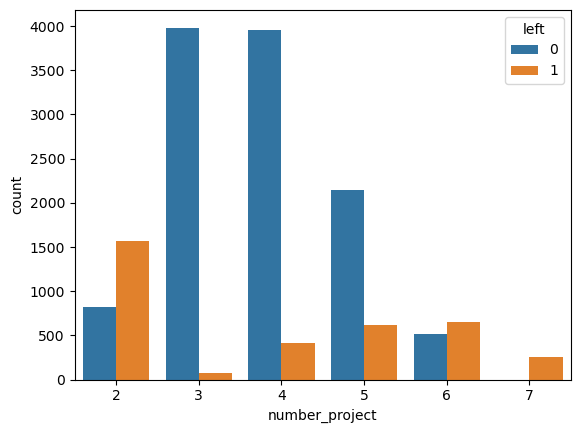

In [9]:
# Draw the bar plot of the employee project count of both employees who left and stayed in the organization
sns.countplot(x='number_project', hue='left', data=df)
plt.show()

### Observations:
- A significant number of employees who left the organization were assigned to 2, 6, and 7 projects.
- Employees who stayed in the organization were assigned to 3, 4, and 5 projects.

## Perform clustering

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Choose columns satisfaction_level, last_evaluation, and left.
left_employees = df[df['left']==1][['satisfaction_level', 'last_evaluation']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(left_employees)

# Do K-means clustering of employees who left the company into 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(scaled_data)

In [11]:
left_employees

,satisfaction_level,last_evaluation,cluster
0,0.38,0.53,0
1,0.80,0.86,1
2,0.11,0.88,2
3,0.72,0.87,1
4,0.37,0.52,0
...,...,...,...
14994,0.40,0.57,0
14995,0.37,0.48,0
14996,0.37,0.53,0
14997,0.11,0.96,2


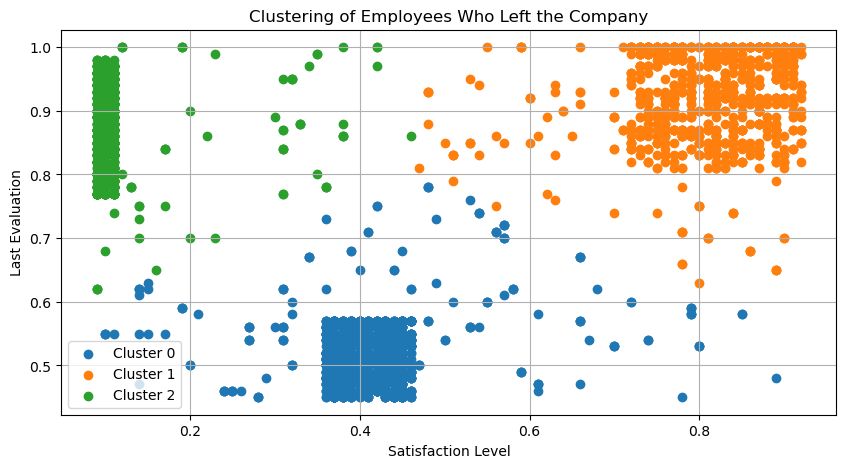

In [12]:
plt.figure(figsize=(10, 5))
for cluster in range(3):
    cluster_data = left_employees[left_employees['cluster']==cluster]
    plt.scatter(cluster_data['satisfaction_level'], cluster_data['last_evaluation'], label=f'Cluster {cluster}')
    
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clustering of Employees Who Left the Company')
plt.legend()
plt.grid(True)
plt.show()

### Observations:
- Cluster 0: Employees with moderate satisfaction levels and low evaluations.
- Cluster 1: Employees with high satisfaction levels and high evaluations.
- Cluster 2: Employees with low satisfaction levels and high evaluations.

## Handle the left Class Imbalance using the SMOTE technique

In [13]:
# Separating categorical and numerical features
categorical_col = df.select_dtypes(include='object').columns

# Apply get dummies for categorical features
df_dummies = pd.get_dummies(df[categorical_col], drop_first=True, dtype=int)

df_dummies.head()

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


In [14]:
# Combining numerical and categorical features
df_combined = pd.concat([df_dummies, numerical_col], axis=1)

df_combined.head()

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0,0,0,0,0,0,1,0,0,1,0,0.38,0.53,2,157,3,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1,0.80,0.86,5,262,6,0,1,0
2,0,0,0,0,0,0,1,0,0,0,1,0.11,0.88,7,272,4,0,1,0
3,0,0,0,0,0,0,1,0,0,1,0,0.72,0.87,5,223,5,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0,0.37,0.52,2,159,3,0,1,0


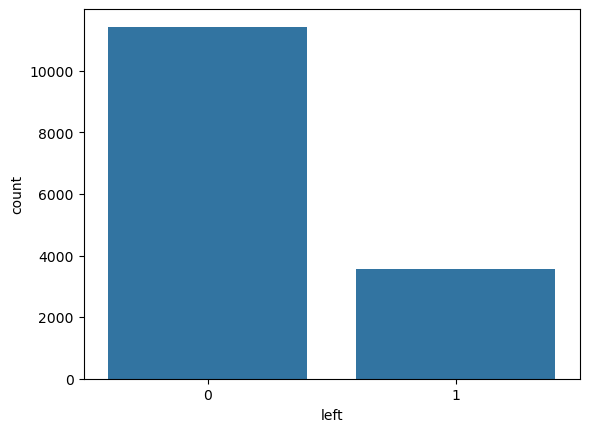

In [15]:
sns.countplot(x='left', data=df_combined)
plt.show()

In [16]:
# Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123
from sklearn.model_selection import train_test_split

X = df_combined.drop('left', axis=1)
y = df_combined['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [28]:
# X_train_sc = scaler.fit_transform(X_train)
# X_test_sc = scaler.transform(X_test)

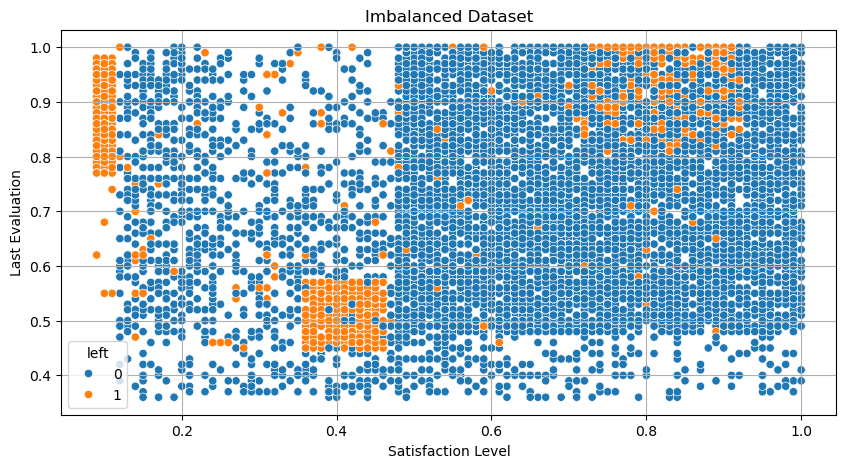

In [29]:
# Scatter plot for the imbalanced dataset
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_train['satisfaction_level'], y=X_train['last_evaluation'], hue=y_train)
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Imbalanced Dataset')
plt.grid(True)

In [30]:
# Apply SMOTE to handle the left class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

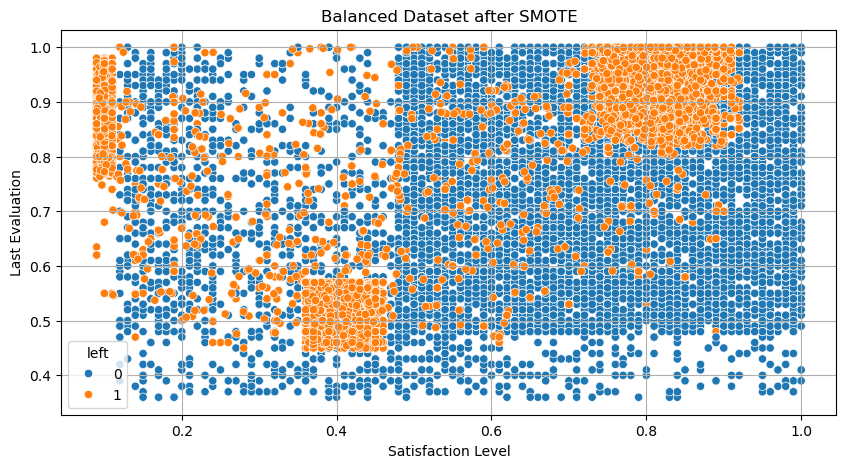

In [31]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_train_smote['satisfaction_level'], y=X_train_smote['last_evaluation'], hue=y_train_smote)
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Balanced Dataset after SMOTE')
plt.grid(True)
plt.show()

## Perform 5-fold cross-validation model training and evaluation

#### Logistic Regression

In [47]:
# Apply a 5-fold CV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

log_reg = LogisticRegression(random_state=42)
scores_log_reg = cross_val_score(log_reg, X_train_smote, y_train_smote, cv=5)

print(f"Mean cross-validation score: {scores_log_reg.mean():.4f}")


Mean cross-validation score: 0.7814


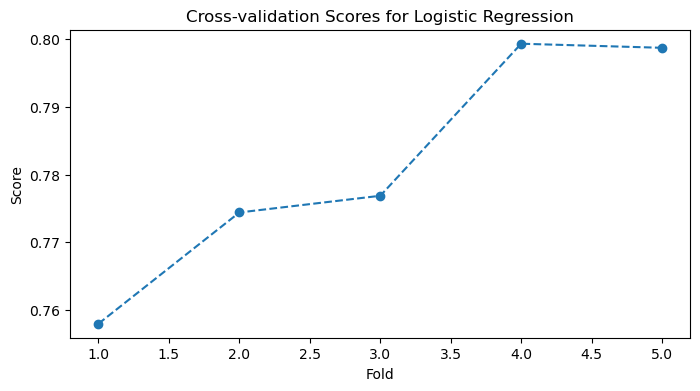

In [48]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), scores_log_reg, marker='o', linestyle='dashed')
plt.xlabel("Fold")
plt.ylabel("Score")
plt.title("Cross-validation Scores for Logistic Regression")
plt.show()


In [53]:
# Plot the classification report
from sklearn.metrics import classification_report

y_pred_log_reg = cross_val_predict(log_reg, X_test, y_test, cv=5)
cr = classification_report(y_test, y_pred_log_reg, output_dict=True)

df_cr = pd.DataFrame(cr).T

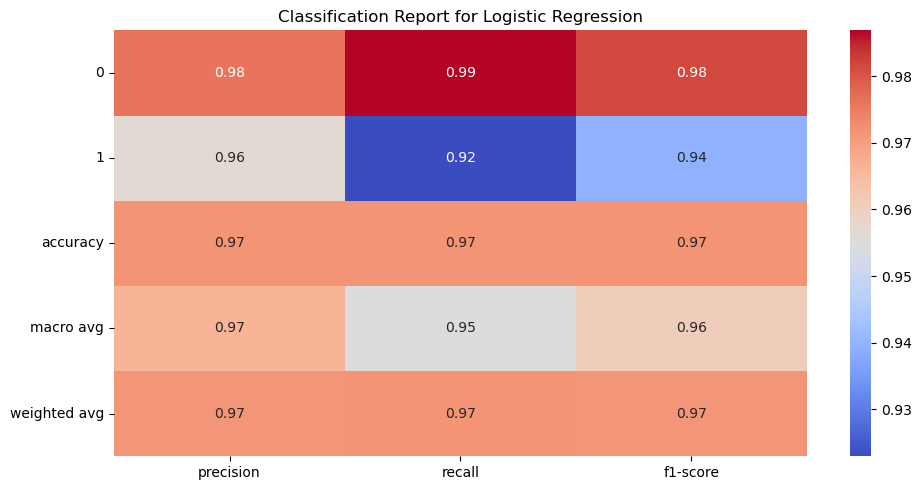

In [51]:
# plot the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(df_cr[['precision','recall', 'f1-score']], annot=True, cmap='coolwarm')
plt.title('Classification Report for Logistic Regression')
plt.tight_layout()
plt.show()

### Observations:
- Class 0: Precision: 0.82, Recall: 0.93, F1: 0.87
- Class 1: Precision: 0.6, Recall: 0.33, F1: 0.42 
- Overall Accuracy: 0.79

#### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
scores_rf_clf = cross_val_score(rf_clf, X_train_smote, y_train_smote, cv=5)

In [40]:
y_pred_rf_clf = cross_val_predict(rf_clf, X_test, y_test, cv=5)
cr = classification_report(y_test, y_pred_rf_clf, output_dict=True)

df_cr = pd.DataFrame(cr).T

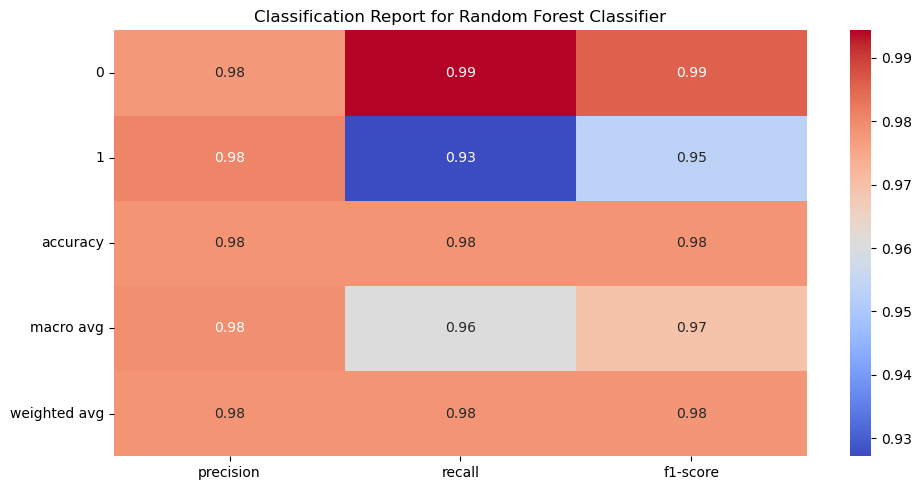

In [41]:
# plot the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(df_cr[['precision','recall', 'f1-score']], annot=True, cmap='coolwarm')
plt.title('Classification Report for Random Forest Classifier')
plt.tight_layout()
plt.show()

### Observations:
- Class 0: Precision: 0.98, Recall: 0.99, F1: 0.99
- Class 1: Precision: 0.98, Recall: 0.93, F1: 0.95 
- Overall Accuracy: 0.98

#### Gradient Boosting Classifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
scores_gb_clf = cross_val_score(gb_clf, X_train_smote, y_train_smote, cv=5)
y_pred_gb_clf = cross_val_predict(gb_clf, X_test, y_test, cv=5)
cr = classification_report(y_test, y_pred_gb_clf, output_dict=True)

In [43]:
df_cr = pd.DataFrame(cr).T

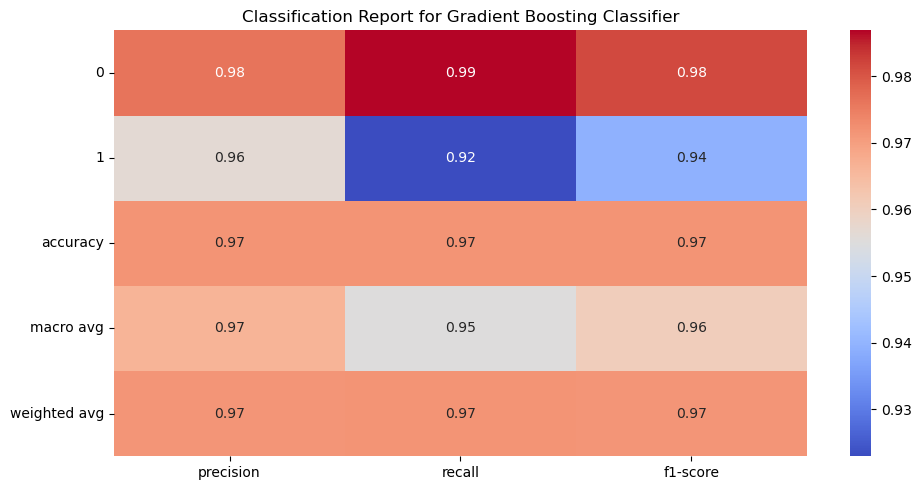

In [44]:
# plot the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(df_cr[['precision','recall', 'f1-score']], annot=True, cmap='coolwarm')
plt.title('Classification Report for Gradient Boosting Classifier')
plt.tight_layout()
plt.show()

### Observations:
- Class 0: Precision: 0.98, Recall: 0.99, F1: 0.98
- Class 1: Precision: 0.96, Recall: 0.92, F1: 0.94
- Overall Accuracy: 0.97

## Conclusion
Random Forest Classifier achieved the highest overall accuracy of 0.98 on the test set